# Histopathologic Cancer Detection: Exploratory Data Analysis

In this notebook, we'll perform a comprehensive exploratory data analysis of the Histopathologic Cancer Detection dataset. We'll examine the characteristics of the dataset, visualize examples from each class, analyze the distribution of pixel values, check for data quality issues, and identify potential preprocessing needs.

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import random
from tqdm.notebook import tqdm
import cv2

# Set plot style
sns.set_style("whitegrid")

# For reproducibility
np.random.seed(42)
random.seed(42)

## 1. Load Data

First, we'll load the dataset and examine its structure.

In [3]:
# Define paths
# Update these paths to match your directory structure
data_dir = '../data'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
train_labels_path = os.path.join(data_dir, 'train_labels.csv')

# Check if the paths exist
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")
print(f"Train labels file exists: {os.path.exists(train_labels_path)}")

Train directory exists: True
Test directory exists: True
Train labels file exists: True


In [4]:
# Load train labels
try:
    train_labels = pd.read_csv(train_labels_path)
    print(f"Train labels shape: {train_labels.shape}")
    print("\nFirst few rows of train_labels:")
    display(train_labels.head())
except Exception as e:
    print(f"Error loading train labels: {e}")
    print("Please make sure the train_labels.csv file is in the correct location.")

Train labels shape: (220025, 2)

First few rows of train_labels:


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


## 2. Analyze Class Distribution

Let's examine the distribution of cancer vs. non-cancer samples in the dataset.

Class distribution:
label
0    130908
1     89117
Name: count, dtype: int64
Percentage of positive samples: 40.50%


/var/folders/0b/kb08wkgd4zs5gc_z02svm2xh0000gn/T/ipykernel_55711/791591715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_labels, palette=['skyblue', 'salmon'])


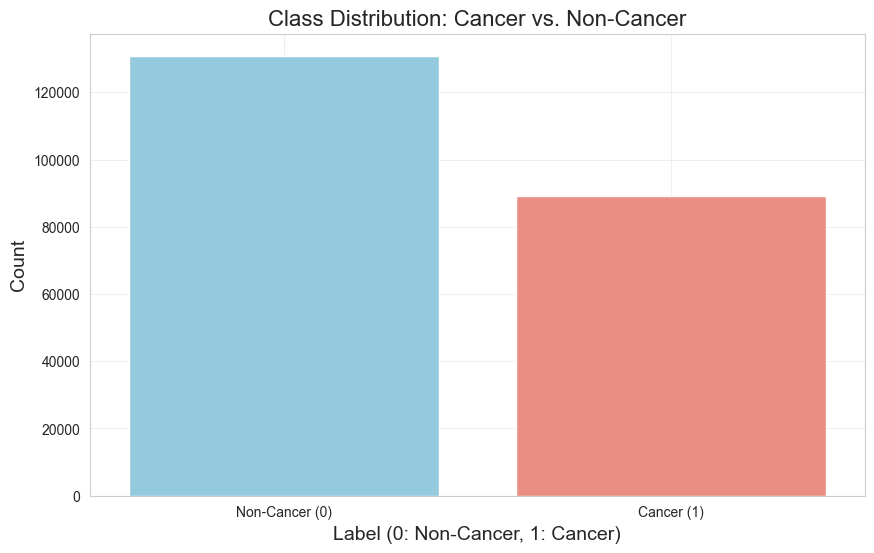

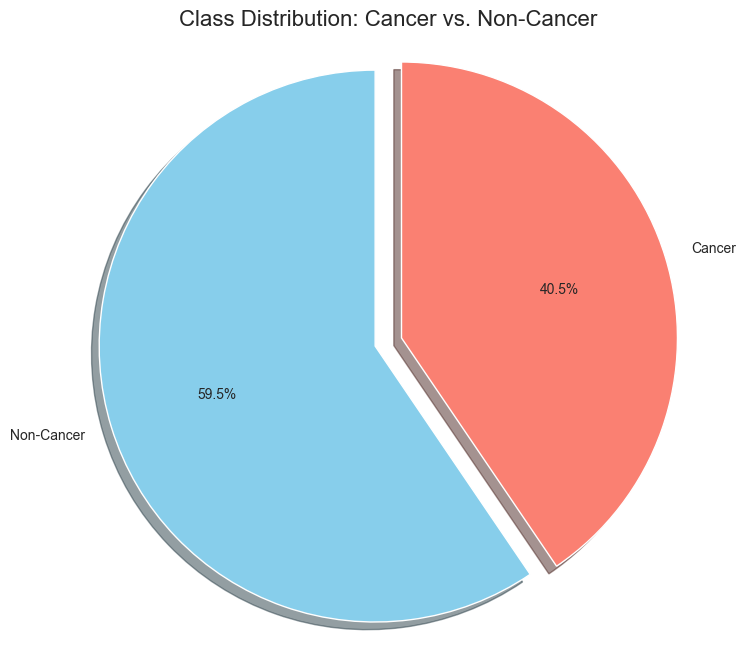

In [5]:
# Analyze class distribution
try:
    class_distribution = train_labels['label'].value_counts()
    print("Class distribution:")
    print(class_distribution)
    print(f"Percentage of positive samples: {class_distribution[1] / len(train_labels) * 100:.2f}%")
    
    # Visualize class distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='label', data=train_labels, palette=['skyblue', 'salmon'])
    plt.title('Class Distribution: Cancer vs. Non-Cancer', fontsize=16)
    plt.xlabel('Label (0: Non-Cancer, 1: Cancer)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks([0, 1], ['Non-Cancer (0)', 'Cancer (1)'])
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(class_distribution, 
            labels=['Non-Cancer', 'Cancer'], 
            autopct='%1.1f%%',
            colors=['skyblue', 'salmon'],
            explode=[0, 0.1],
            shadow=True,
            startangle=90)
    plt.title('Class Distribution: Cancer vs. Non-Cancer', fontsize=16)
    plt.axis('equal')
    plt.show()
except Exception as e:
    print(f"Error analyzing class distribution: {e}")

## 3. Visualize Sample Images

Let's visualize some sample images from each class to understand what we're working with.

In [7]:
def load_image(image_id, directory=train_dir):
    """Load an image from the specified directory."""
    try:
        img_path = os.path.join(directory, f"{image_id}.tif")
        img = Image.open(img_path)
        return np.array(img)
    except Exception as e:
        print(f"Error loading image {image_id}: {e}")
        return None

def display_images(image_ids, labels, title, rows=2, cols=5):
    """Display a grid of images with their labels."""
    plt.figure(figsize=(cols*3, rows*3))
    for i, (img_id, label) in enumerate(zip(image_ids, labels)):
        if i >= rows*cols:
            break
            
        img = load_image(img_id)
        if img is None:
            continue
            
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.title(f"Label: {label} ({'Cancer' if label == 1 else 'Non-Cancer'})")
        plt.axis('off')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

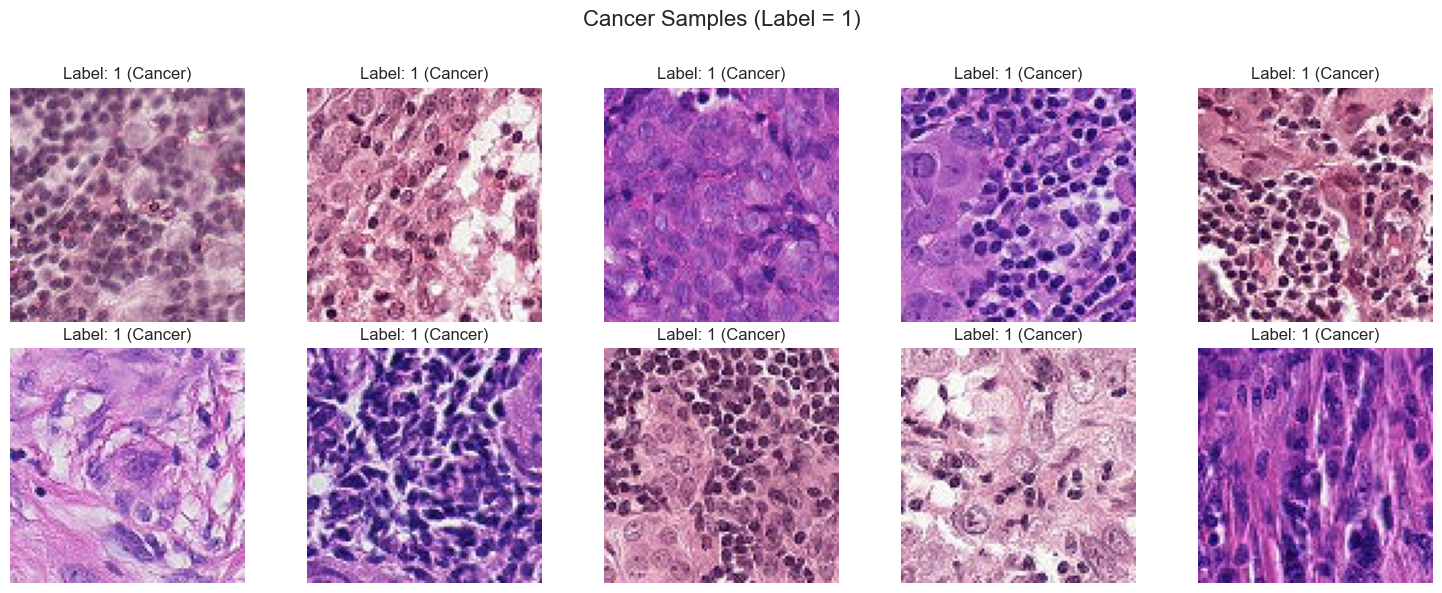

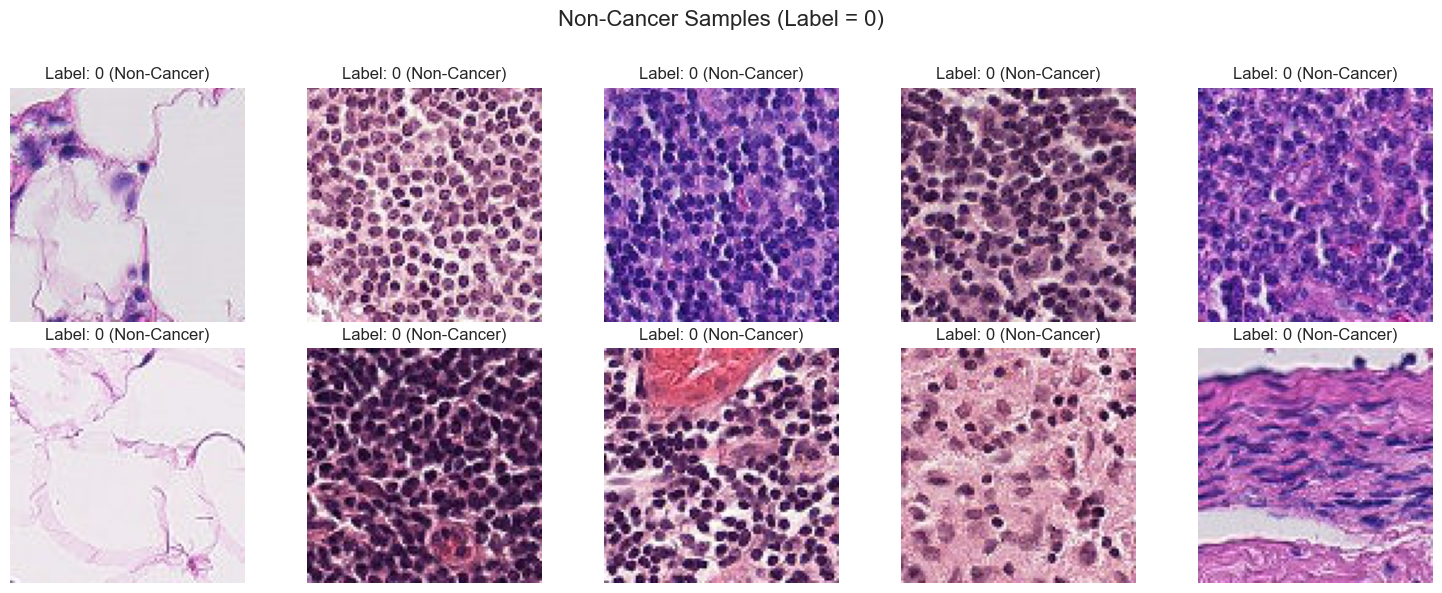

In [8]:
try:
    # Get sample images from each class
    cancer_samples = train_labels[train_labels['label'] == 1].sample(10)
    non_cancer_samples = train_labels[train_labels['label'] == 0].sample(10)
    
    # Display cancer samples
    display_images(cancer_samples['id'], cancer_samples['label'], 'Cancer Samples (Label = 1)')
    
    # Display non-cancer samples
    display_images(non_cancer_samples['id'], non_cancer_samples['label'], 'Non-Cancer Samples (Label = 0)')
except Exception as e:
    print(f"Error displaying sample images: {e}")

## 4. Analyze Image Properties

Let's examine the properties of the images, such as dimensions and color channels.

In [9]:
try:
    # Get a sample image
    sample_id = train_labels['id'].iloc[0]
    sample_img = load_image(sample_id)
    
    if sample_img is not None:
        print(f"Image shape: {sample_img.shape}")
        print(f"Image data type: {sample_img.dtype}")
        print(f"Min pixel value: {sample_img.min()}")
        print(f"Max pixel value: {sample_img.max()}")
        print(f"Mean pixel value: {sample_img.mean():.2f}")
        print(f"Standard deviation: {sample_img.std():.2f}")
except Exception as e:
    print(f"Error analyzing image properties: {e}")

Image shape: (96, 96, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 232.89
Standard deviation: 34.03


## 5. Analyze Pixel Value Distribution

Let's analyze the distribution of pixel values in the images.

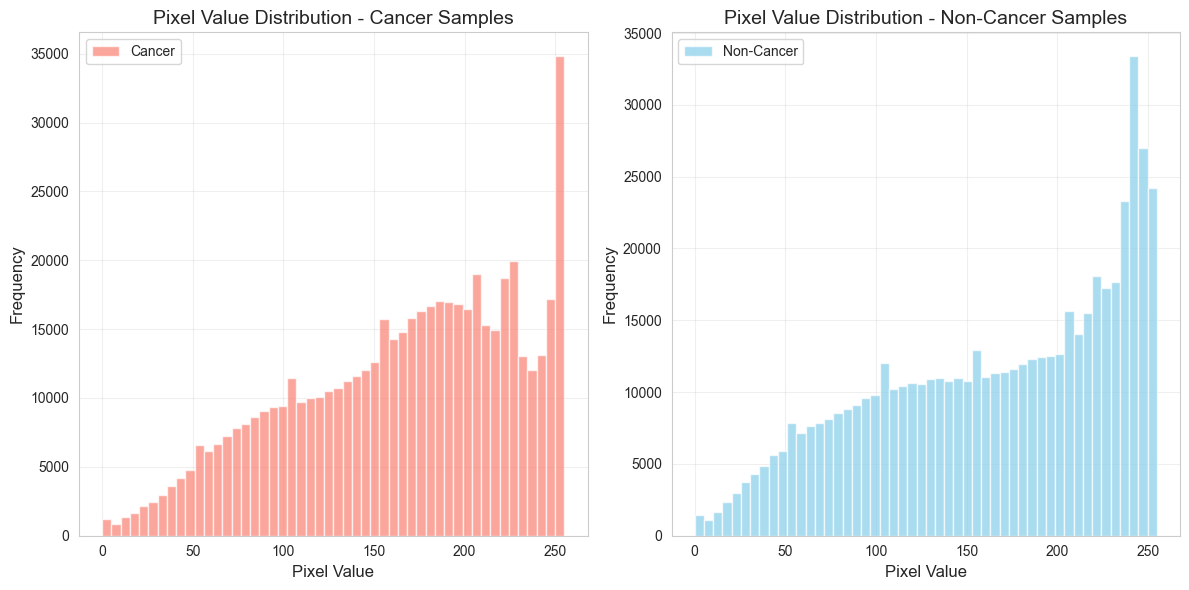

In [10]:
try:
    # Load a sample of images from each class
    n_samples = 20  # Number of samples to analyze
    
    # Cancer samples
    cancer_ids = train_labels[train_labels['label'] == 1].sample(n_samples)['id']
    cancer_images = [load_image(img_id) for img_id in cancer_ids]
    cancer_images = [img for img in cancer_images if img is not None]
    
    # Non-cancer samples
    non_cancer_ids = train_labels[train_labels['label'] == 0].sample(n_samples)['id']
    non_cancer_images = [load_image(img_id) for img_id in non_cancer_ids]
    non_cancer_images = [img for img in non_cancer_images if img is not None]
    
    # Flatten all pixel values
    cancer_pixels = np.concatenate([img.flatten() for img in cancer_images])
    non_cancer_pixels = np.concatenate([img.flatten() for img in non_cancer_images])
    
    # Plot histograms
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(cancer_pixels, bins=50, alpha=0.7, color='salmon', label='Cancer')
    plt.title('Pixel Value Distribution - Cancer Samples', fontsize=14)
    plt.xlabel('Pixel Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(non_cancer_pixels, bins=50, alpha=0.7, color='skyblue', label='Non-Cancer')
    plt.title('Pixel Value Distribution - Non-Cancer Samples', fontsize=14)
    plt.xlabel('Pixel Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error analyzing pixel distributions: {e}")

## 6. Check for Data Quality Issues

Let's check for potential data quality issues, such as corrupted images, outliers, or inconsistencies.

In [11]:
try:
    # Sample a subset of images
    n_samples = 100
    sample_ids = train_labels['id'].sample(n_samples).tolist()
    
    # Initialize counters and lists for statistics
    n_loaded = 0
    n_failed = 0
    shapes = []
    means = []
    stds = []
    failed_ids = []
    
    # Check each image
    for img_id in tqdm(sample_ids, desc="Checking images"):
        try:
            img = load_image(img_id)
            if img is None:
                n_failed += 1
                failed_ids.append(img_id)
                continue
                
            n_loaded += 1
            shapes.append(img.shape)
            means.append(img.mean())
            stds.append(img.std())
        except Exception as e:
            n_failed += 1
            failed_ids.append(img_id)
            print(f"Error processing image {img_id}: {e}")
    
    # Report results
    print(f"Checked {n_loaded + n_failed} images:")
    print(f"  - Successfully loaded: {n_loaded} ({n_loaded/(n_loaded+n_failed)*100:.2f}%)")
    print(f"  - Failed to load: {n_failed} ({n_failed/(n_loaded+n_failed)*100:.2f}%)")
    
    if n_loaded > 0:
        # Check for shape consistency
        unique_shapes = set(str(s) for s in shapes)
        print(f"\nImage shapes: {len(unique_shapes)} unique shape(s)")
        for shape in unique_shapes:
            count = sum(1 for s in shapes if str(s) == shape)
            print(f"  - {shape}: {count} images ({count/n_loaded*100:.2f}%)")
except Exception as e:
    print(f"Error checking image quality: {e}")

Checking images:   0%|          | 0/100 [00:00<?, ?it/s]

Checked 100 images:
  - Successfully loaded: 100 (100.00%)
  - Failed to load: 0 (0.00%)

Image shapes: 1 unique shape(s)
  - (96, 96, 3): 100 images (100.00%)


## 7. Analyze Image Complexity

Let's analyze the complexity of the images to better understand what distinguishes cancer from non-cancer samples.

In [12]:
def extract_image_features(img):
    """Extract basic features from an image."""
    # Convert to grayscale
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray = img
    
    # Calculate basic statistics
    mean = gray.mean()
    std = gray.std()
    
    # Edge detection using Canny
    edges = cv2.Canny(gray, 100, 200)
    edge_density = edges.sum() / (edges.shape[0] * edges.shape[1])
    
    return {
        'mean': mean,
        'std': std,
        'edge_density': edge_density
    }

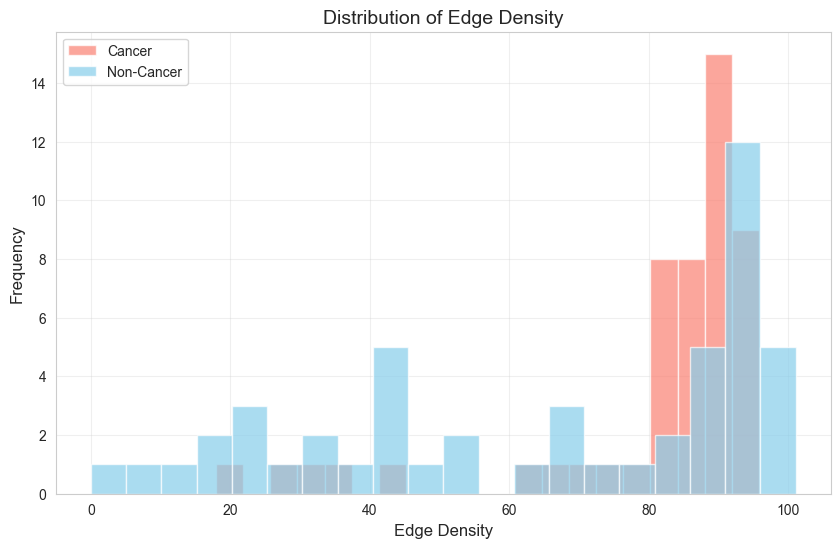

Cancer samples - Average edge density: 81.0549
Non-cancer samples - Average edge density: 65.4179


In [13]:
try:
    # Extract features from a sample of images
    n_samples = 50  # Number of samples per class
    
    # Cancer samples
    cancer_ids = train_labels[train_labels['label'] == 1].sample(n_samples)['id']
    cancer_images = [load_image(img_id) for img_id in cancer_ids]
    cancer_images = [img for img in cancer_images if img is not None]
    cancer_features = [extract_image_features(img) for img in cancer_images]
    
    # Non-cancer samples
    non_cancer_ids = train_labels[train_labels['label'] == 0].sample(n_samples)['id']
    non_cancer_images = [load_image(img_id) for img_id in non_cancer_ids]
    non_cancer_images = [img for img in non_cancer_images if img is not None]
    non_cancer_features = [extract_image_features(img) for img in non_cancer_images]
    
    # Compare edge density between classes
    cancer_edge_density = [f['edge_density'] for f in cancer_features]
    non_cancer_edge_density = [f['edge_density'] for f in non_cancer_features]
    
    plt.figure(figsize=(10, 6))
    plt.hist(cancer_edge_density, bins=20, alpha=0.7, color='salmon', label='Cancer')
    plt.hist(non_cancer_edge_density, bins=20, alpha=0.7, color='skyblue', label='Non-Cancer')
    plt.title('Distribution of Edge Density', fontsize=14)
    plt.xlabel('Edge Density', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print average values
    print(f"Cancer samples - Average edge density: {np.mean(cancer_edge_density):.4f}")
    print(f"Non-cancer samples - Average edge density: {np.mean(non_cancer_edge_density):.4f}")
except Exception as e:
    print(f"Error analyzing image complexity: {e}")

## 8. Visualize Color Channels

Let's examine the color channels of the images to see if there are any patterns or differences between cancer and non-cancer samples.

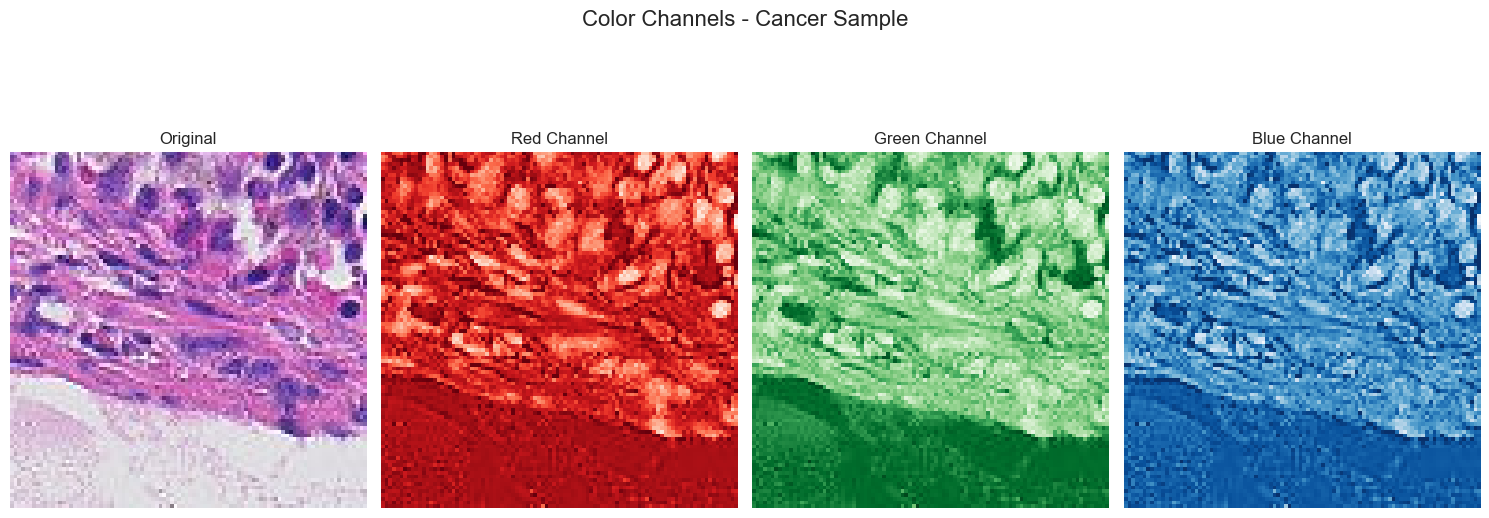

In [14]:
try:
    # Get a sample image from each class
    cancer_id = train_labels[train_labels['label'] == 1].sample(1)['id'].iloc[0]
    non_cancer_id = train_labels[train_labels['label'] == 0].sample(1)['id'].iloc[0]
    
    cancer_img = load_image(cancer_id)
    non_cancer_img = load_image(non_cancer_id)
    
    if cancer_img is not None and non_cancer_img is not None:
        # Display cancer image channels
        plt.figure(figsize=(15, 6))
        plt.suptitle('Color Channels - Cancer Sample', fontsize=16)
        
        plt.subplot(1, 4, 1)
        plt.imshow(cancer_img)
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(1, 4, 2)
        plt.imshow(cancer_img[:,:,0], cmap='Reds')
        plt.title('Red Channel')
        plt.axis('off')
        
        plt.subplot(1, 4, 3)
        plt.imshow(cancer_img[:,:,1], cmap='Greens')
        plt.title('Green Channel')
        plt.axis('off')
        
        plt.subplot(1, 4, 4)
        plt.imshow(cancer_img[:,:,2], cmap='Blues')
        plt.title('Blue Channel')
        plt.axis('off')
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
except Exception as e:
    print(f"Error visualizing color channels: {e}")

## 9. Summary of Findings and Preprocessing Recommendations

### Key Findings:

1. **Dataset Composition**: The dataset consists of histopathologic images with a binary classification task (cancer vs. non-cancer).

2. **Class Distribution**: The dataset has an imbalanced class distribution, with more non-cancer samples than cancer samples.

3. **Image Properties**: All images have the same dimensions (96x96 pixels) and are in RGB format.

4. **Pixel Value Distribution**: The pixel values are distributed across the full range (0-255), with some differences in distribution between cancer and non-cancer samples.

5. **Image Complexity**: Cancer samples tend to have different edge density patterns compared to non-cancer samples, which could be a useful feature for classification.

6. **Color Channels**: The different color channels contain varying information, with some channels potentially being more informative than others for distinguishing between classes.

### Preprocessing Recommendations:

1. **Normalization**: Normalize pixel values to the range [0, 1] by dividing by 255. This will help with model convergence and stability.

2. **Data Augmentation**: Apply data augmentation techniques to increase the diversity of the training data and help prevent overfitting. Suitable augmentations for histopathology images include:
   - Random rotations (90°, 180°, 270°)
   - Random flips (horizontal and vertical)
   - Small random brightness and contrast adjustments
   - Small random zooms

3. **Class Balancing**: Address the class imbalance using techniques such as:
   - Oversampling the minority class (cancer samples)
   - Using class weights in the loss function
   - Implementing balanced batch sampling

4. **Color Space Exploration**: Consider exploring different color spaces (RGB, HSV, LAB) or using specific color channels that might better highlight the differences between cancer and non-cancer samples.

5. **Feature Extraction**: Consider extracting features like edge density, texture features, or color histograms as additional inputs to the model or for creating ensemble models.

6. **Image Standardization**: Standardize images by subtracting the mean and dividing by the standard deviation to center the data around zero with unit variance.

7. **Train-Validation Split**: Implement a stratified train-validation split to ensure that both sets have similar class distributions.